In [1]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from urllib import urlretrieve
import cPickle as pickle
import os
import gzip

import numpy as np
import theano

import lasagne
from lasagne import layers
from lasagne.updates import nesterov_momentum

from nolearn.lasagne import NeuralNet
from nolearn.lasagne import visualize

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
%pylab inline

/Users/partho/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Populating the interactive namespace from numpy and matplotlib


In [5]:
def load_dataset():
    url = 'http://deeplearning.net/data/mnist/mnist.pkl.gz'
    filename = 'mnist.pkl.gz'
    if not os.path.exists(filename):
        print("Downloading MNIST dataset...")
        urlretrieve(url, filename)

    with gzip.open(filename, 'rb') as f:
        data = pickle.load(f)

    X_train, y_train = data[0]
    X_val, y_val = data[1]
    X_test, y_test = data[2]

    X_train = X_train.reshape((-1, 1, 28, 28))
    X_val = X_val.reshape((-1, 1, 28, 28))
    X_test = X_test.reshape((-1, 1, 28, 28))

    y_train = y_train.astype(np.uint8)
    y_val = y_val.astype(np.uint8)
    y_test = y_test.astype(np.uint8)

    return X_train, y_train, X_val, y_val, X_test, y_test

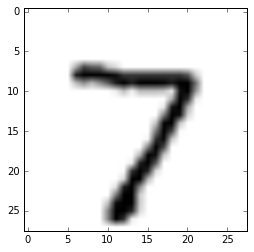

In [6]:
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset()
plt.imshow(X_test[0][0], cmap=cm.binary)
# a = X_test[4][None, :, :]
# a

In [39]:
net1 = NeuralNet(
    layers=[('input', layers.InputLayer),
            ('conv2d1', layers.Conv2DLayer),
            ('maxpool1', layers.MaxPool2DLayer),
            ('conv2d2', layers.Conv2DLayer),
            ('maxpool2', layers.MaxPool2DLayer),
            ('dropout1', layers.DropoutLayer),
            ('dense', layers.DenseLayer),
            ('dropout2', layers.DropoutLayer),
            ('output', layers.DenseLayer),
            ],
    # input layer
    input_shape=(None, 1, 28, 28),
    # layer conv2d1
    conv2d1_num_filters=32,
    conv2d1_filter_size=(5, 5),
    conv2d1_nonlinearity=lasagne.nonlinearities.rectify,
    conv2d1_W=lasagne.init.GlorotUniform(),  
    # layer maxpool1
    maxpool1_pool_size=(2, 2),    
    # layer conv2d2
    conv2d2_num_filters=32,
    conv2d2_filter_size=(5, 5),
    conv2d2_nonlinearity=lasagne.nonlinearities.rectify,
    # layer maxpool2
    maxpool2_pool_size=(2, 2),
    # dropout1
    dropout1_p=0.5,    
    # dense
    dense_num_units=256,
    dense_nonlinearity=lasagne.nonlinearities.rectify,    
    # dropout2
    dropout2_p=0.5,    
    # output
    output_nonlinearity=lasagne.nonlinearities.softmax,
    output_num_units=10,
    # optimization method params
    update=nesterov_momentum,
    update_learning_rate=0.01,
    update_momentum=0.9,
    max_epochs=20,
    verbose=1,
    )


In [40]:
# Train the network
nn = net1.fit(X_train, y_train)

# Neural Network with 160362 learnable parameters

## Layer information

  #  name      size
---  --------  --------
  0  input     1x28x28
  1  conv2d1   32x24x24
  2  maxpool1  32x12x12
  3  conv2d2   32x8x8
  4  maxpool2  32x4x4
  5  dropout1  32x4x4
  6  dense     256
  7  dropout2  256
  8  output    10

  epoch    trn loss    val loss    trn/val    valid acc  dur
-------  ----------  ----------  ---------  -----------  ------
      1     0.75465     0.15862    4.75753      0.95522  59.87s
      2     0.25923     0.10872    2.38445      0.97001  55.35s
      3     0.19690     0.08860    2.22231      0.97451  62.64s
      4     0.16530     0.07823    2.11307      0.97801  59.28s
      5     0.14054     0.06754    2.08091      0.98111  61.21s
      6     0.12730     0.06461    1.97023      0.98131  56.62s
      7     0.11316     0.05733    1.97393      0.98421  58.93s
      8     0.10354     0.05590    1.85216      0.98491  58.20s
      9     0.09475     0.05406    1.75267      0.98

In [31]:
net2 = NeuralNet(
    layers=[('input', layers.InputLayer),
            ('conv2d1', layers.Conv2DLayer),
            ('conv2d2', layers.Conv2DLayer),
            ('conv2d3', layers.Conv2DLayer),
            ('conv2d4', layers.Conv2DLayer),
            ('conv2d5', layers.Conv2DLayer),
            
            ('maxpool1', layers.MaxPool2DLayer),
            
            ('conv2d6', layers.Conv2DLayer),
            ('conv2d7', layers.Conv2DLayer),
            ('conv2d8', layers.Conv2DLayer),
            
            ('maxpool2', layers.MaxPool2DLayer),
            
            ('dense1', layers.DenseLayer),
            ('dropout', layers.DropoutLayer),
            ('dense2', layers.DenseLayer),
            
            ('output', layers.DenseLayer),
            ],
    # input layer
    input_shape=(None, 1, 28, 28),
    # layer conv2d1
    conv2d1_num_filters=96,
    conv2d1_filter_size=(5, 5),
    conv2d1_nonlinearity=lasagne.nonlinearities.rectify,
    conv2d1_W=lasagne.init.GlorotUniform(),  
    
     # layer conv2d2
    conv2d2_num_filters=96,
    conv2d2_filter_size=(3, 3),
    conv2d2_nonlinearity=lasagne.nonlinearities.rectify,
    
     # layer conv2d3
    conv2d3_num_filters=96,
    conv2d3_filter_size=(3, 3),
    conv2d3_nonlinearity=lasagne.nonlinearities.rectify,
    
     # layer conv2d4
    conv2d4_num_filters=96,
    conv2d4_filter_size=(3, 3),
    conv2d4_nonlinearity=lasagne.nonlinearities.rectify,
    
     # layer conv2d5
    conv2d5_num_filters=96,
    conv2d5_filter_size=(3, 3),
    conv2d5_nonlinearity=lasagne.nonlinearities.rectify,
    
    
    # layer maxpool1
    maxpool1_pool_size=(2, 2),    
    
    
    # layer conv2d6
    conv2d6_num_filters=128,
    conv2d6_filter_size=(3, 3),
    conv2d6_nonlinearity=lasagne.nonlinearities.rectify,
    
    # layer conv2d7
    conv2d7_num_filters=128,
    conv2d7_filter_size=(3, 3),
    conv2d7_nonlinearity=lasagne.nonlinearities.rectify,
    
    # layer conv2d8
    conv2d8_num_filters=128,
    conv2d8_filter_size=(3, 3),
    conv2d8_nonlinearity=lasagne.nonlinearities.rectify,
    
    # layer maxpool2
    maxpool2_pool_size=(2, 2),
    
    
    # layer dense1
    dense1_num_units=64,
    dense1_nonlinearity=lasagne.nonlinearities.rectify,  
    
    # layer dropout
    dropout_p=0.5, 
    
    # layer dense2
    dense2_num_units=64,
    dense2_nonlinearity=lasagne.nonlinearities.rectify, 
    
      
    # layer output
    output_nonlinearity=lasagne.nonlinearities.softmax,
    output_num_units=10,
    
    
    # optimization method params
    update=nesterov_momentum,
    update_learning_rate=0.01,
    update_momentum=0.9,
    max_epochs=10,
    verbose=1,
    )

# 

In [32]:
nn2 = net2.fit(X_train, y_train)

# Neural Network with 753610 learnable parameters

## Layer information

  #  name      size
---  --------  --------
  0  input     1x28x28
  1  conv2d1   96x24x24
  2  conv2d2   96x22x22
  3  conv2d3   96x20x20
  4  conv2d4   96x18x18
  5  conv2d5   96x16x16
  6  maxpool1  96x8x8
  7  conv2d6   128x6x6
  8  conv2d7   128x4x4
  9  conv2d8   128x2x2
 10  maxpool2  128x1x1
 11  dense1    64
 12  dropout   64
 13  dense2    64
 14  output    10

  epoch    trn loss    val loss    trn/val    valid acc  dur
-------  ----------  ----------  ---------  -----------  --------
      1     1.23041     0.21212    5.80058      0.93693  1408.30s
      2     0.23246     0.11961    1.94337      0.96512  1468.25s
      3     0.13906     0.10682    1.30175      0.96952  1589.37s
      4     0.10358     0.06759    1.53242      0.98081  1586.81s
      5     0.08270     0.06326    1.30722      0.98321  1541.19s
      6     0.06542     0.07870    0.83133      0.98071  1747.37s
      7     0.06059     0.0580

In [41]:
import cPickle as pickle
with open('convNet.save', 'wb') as f:
    pickle.dump(net1, f, protocol=cPickle.HIGHEST_PROTOCOL)

In [42]:
preds = net1.predict(X_test)
print classification_report(y_test, preds)

from sklearn.metrics import accuracy_score
print "Accuracy (%): ", accuracy_score(y_test, preds)

             precision    recall  f1-score   support

          0       0.99      1.00      0.99       980
          1       1.00      0.99      1.00      1135
          2       0.99      1.00      1.00      1032
          3       0.99      0.99      0.99      1010
          4       0.99      0.99      0.99       982
          5       0.99      0.99      0.99       892
          6       0.99      0.99      0.99       958
          7       0.99      0.99      0.99      1028
          8       1.00      0.99      0.99       974
          9       0.98      0.98      0.98      1009

avg / total       0.99      0.99      0.99     10000

Accuracy (%):  0.9911


In [36]:
preds = net2.predict(X_test)
print classification_report(y_test, preds)

             precision    recall  f1-score   support

          0       0.99      0.99      0.99       980
          1       0.99      1.00      0.99      1135
          2       0.99      0.99      0.99      1032
          3       0.99      0.99      0.99      1010
          4       0.99      0.99      0.99       982
          5       0.99      0.99      0.99       892
          6       0.98      0.99      0.99       958
          7       0.99      0.99      0.99      1028
          8       0.99      0.99      0.99       974
          9       0.99      0.98      0.99      1009

avg / total       0.99      0.99      0.99     10000



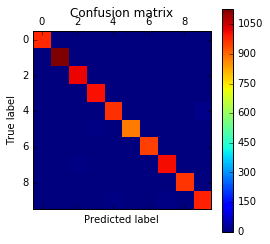

In [19]:
cm = confusion_matrix(y_test, preds)
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

<module 'matplotlib.pyplot' from '/Users/partho/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

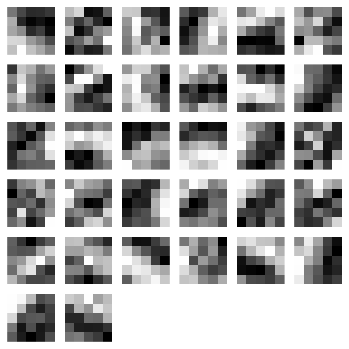

In [20]:
visualize.plot_conv_weights(net1.layers_['conv2d1'])

In [43]:
dense_layer = layers.get_output(net1.layers_['dense'], deterministic=True)
output_layer = layers.get_output(net1.layers_['output'], deterministic=True)
input_var = net1.layers_['input'].input_var

f_output = theano.function([input_var], output_layer)
f_dense = theano.function([input_var], dense_layer)

In [44]:
with open('convNet_output.save', 'wb') as f:
    pickle.dump(output_layer, f, protocol=cPickle.HIGHEST_PROTOCOL)

In [61]:
instance = X_test[0][None, :, :]
%timeit -n 500 f_output(instance)


500 loops, best of 3: 849 µs per loop


<Container object of 10 artists>

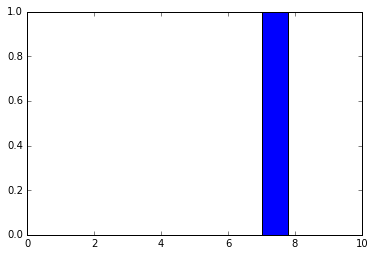

In [62]:
pred = f_output(instance)
N = pred.shape[1]
plt.bar(range(N), pred.ravel())

<Container object of 256 artists>

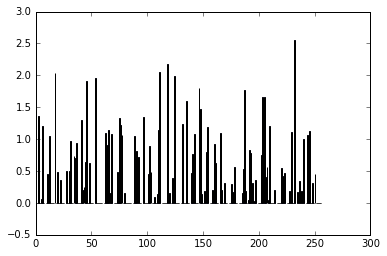

In [30]:
pred = f_dense(instance)
N = pred.shape[1]
plt.bar(range(N), pred.ravel())

In [4]:
# import cv2
# from sklearn.externals import joblib
# from skimage.feature import hog
# import numpy as np
# import argparse as ap
# import matplotlib.pyplot as plt
import cPickle as pickle
%pylab inline


# Load the classifier
with open("convNet.save", "rb") as f:
     net = pickle.load(f)

Populating the interactive namespace from numpy and matplotlib


In [8]:
net.predict(X_test[1][None, :, :])[0]

2

In [2]:
import cPickle as pickle
%pylab inline


# Load the classifier
with open("convNet_output.save", "rb") as f:
     data = pickle.load(f)

Populating the interactive namespace from numpy and matplotlib


<Container object of 10 artists>

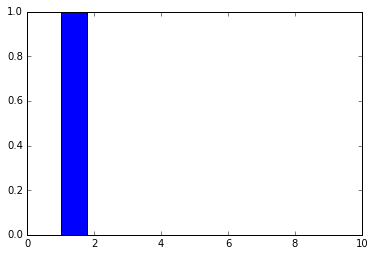

In [75]:
pred = f_output(X_test[2][None, :, :])
N = pred.shape[1]
plt.bar(range(N), pred.ravel())

In [50]:
with open('convNet_dense.save', 'wb') as f:
    pickle.dump(dense_layer, f, protocol=cPickle.HIGHEST_PROTOCOL)

Populating the interactive namespace from numpy and matplotlib


(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

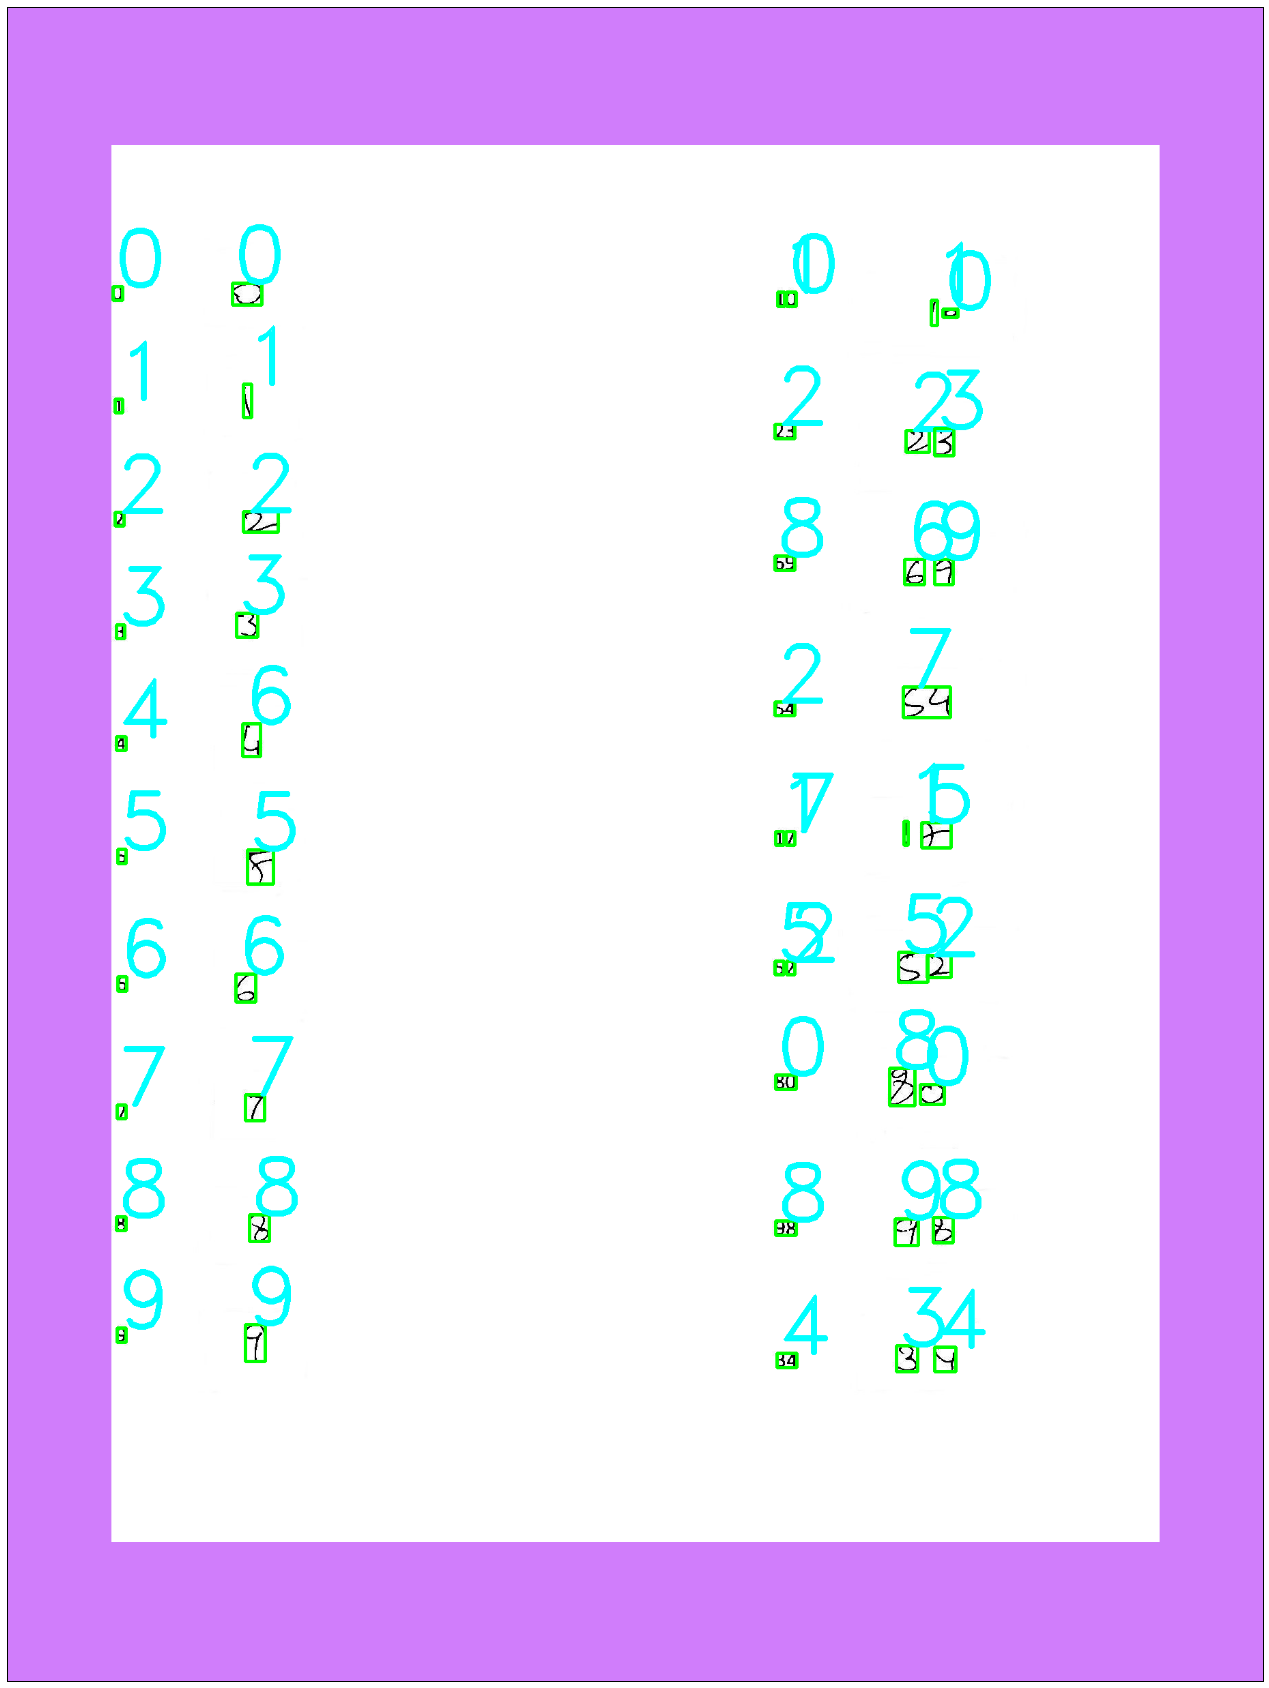

In [48]:
import cv2
from sklearn.externals import joblib
from skimage.feature import hog
import numpy as np
import argparse as ap
import matplotlib.pyplot as plt
import scipy.misc
%pylab inline


# # Get the path of the training set
# parser = ap.ArgumentParser()
# parser.add_argument("-c", "--classiferPath", help="Path to Classifier File", required="True")
# parser.add_argument("-i", "--image", help="Path to Image", required="True")
# args = vars(parser.parse_args())

# # Load the classifier
# clf, pp = joblib.load(args["classiferPath"])

# # Read the input image 
# im = cv2.imread(args["image"])


# pred = net.predict(X_test[5][None, :, :])[0]
# pred

# Read the input image 2
im = cv2.imread('/Users/partho/Desktop/THESIS/CSI Teammates/Student 7/Binarized_Erased/1_2.jpeg')

#Add border to resolve ssize.area() > 0 in function resize

row, col= im.shape[:2]

top = int(0.1*row)
bottom = int(0.1*row)
left = int(0.1*col)
right = int(0.1*col)

value = np.random.randint(0,255,(3,)).tolist()

#im=cv2.copyMakeBorder(im, top, bottom, left, right, cv2.BORDER_REPLICATE)
im=cv2.copyMakeBorder(im, top, bottom, left, right, cv2.BORDER_CONSTANT, value = value)



# Convert to grayscale and apply Gaussian filtering
im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
im_gray = cv2.GaussianBlur(im_gray, (5, 5), 0)
kernel = np.ones((5,5),np.uint8)
im_gray = cv2.morphologyEx(im_gray, cv2.MORPH_OPEN, kernel)
#im_gray = cv2.morphologyEx(im_gray, cv2.MORPH_CLOSE, kernel)


# Threshold the image
ret, im_th = cv2.threshold(im_gray, 150, 255, cv2.THRESH_BINARY_INV)
#im_th = cv2.adaptiveThreshold(im_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 5, 7)

# Find contours in the image
ctrs, hier = cv2.findContours(im_th.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#ctrs, hier = cv2.findContours(im_th.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

# Get rectangles contains each contour
rects = [cv2.boundingRect(ctr) for ctr in ctrs]

# # For each rectangular region, calculate HOG features and predict
# # the digit using Linear SVM.

for rect in rects:
    # Draw the rectangles
    cv2.rectangle(im, (rect[0], rect[1]), (rect[0] + rect[2], rect[1] + rect[3]), (0, 255, 0), 3) 
    # Make the rectangular region around the digit
    leng = int(rect[3] * 1.6)
    pt1 = int(rect[1] + rect[3] // 2 - leng // 2)
    pt2 = int(rect[0] + rect[2] // 2 - leng // 2)
    roi = im_th[pt1:pt1+leng, pt2:pt2+leng]
    # Resize the image
    roi = cv2.resize(roi, (28, 28), interpolation=cv2.INTER_AREA)
    roi = cv2.dilate(roi, (3, 3))
    
    img_data = roi.reshape(1,1,28,28)
    img_data = (img_data /255.0 * 0.99) + 0.01
    nbr = net.predict(img_data)[0]
    cv2.putText(im, str(nbr), (rect[0], rect[1]),cv2.FONT_HERSHEY_DUPLEX, 4, (0, 255, 255), 3)
    
#      cv2.putText(im, str(int(nbr[0])), (rect[0], rect[1]),cv2.FONT_HERSHEY_DUPLEX, 4, (0, 255, 255), 3)

# # cv2.namedWindow("Resulting Image with Rectangular ROIs", cv2.WINDOW_NORMAL)
# # cv2.imshow("Resulting Image with Rectangular ROIs", im)

plt.figure(figsize=(30,30))
plt.imshow(im)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis

In [39]:

# helper to load data from PNG image files
import scipy.misc 

# load image data from png files into an array
image_file_name = '/Users/partho/Desktop/Thesis_Pics/a.jpg'
img_array = scipy.misc.imread(image_file_name, flatten=True)

# reshape from 28x28 to list of 784 values, invert values
img_data  = 255.0 - img_data.reshape(1,1,28,28)

# then scale data to range from 0.01 to 1.0
img_data = (img_data / 255.0)


    

In [40]:
net.predict(img_data)

array([8])

In [ ]:
# Number of images of digits.
ndigits = digits.shape[0];

# Reshape them to rectangular images.
images = digits.reshape([ndigits,28,28]);

# Calculate the sum of pixel values for each image.
imagesums = numpy.sum(numpy.sum(images,axis=1),axis=1);

# Create mesh of x and y coordinates.

indices = numpy.arange(28);
X, Y = numpy.meshgrid(indices, indices);

# Calculate centroid coordinates for each image.

centroidx = numpy.array([numpy.sum(images[i] * X) for i in xrange(ndigits)]) / imagesums;
centroidy = numpy.array([numpy.sum(images[i] * Y) for i in xrange(ndigits)]) / imagesums;

# This code is faster and yields the same result.

centroidx = numpy.sum(numpy.sum(images*X,axis=1),axis=1)/imagesums;
centroidy = numpy.sum(numpy.sum(images*Y,axis=1),axis=1)/imagesums;

# What range do centroid coordinates span?

print numpy.min(centroidx), numpy.max(centroidx);
print numpy.min(centroidy), numpy.max(centroidy);